## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_04-12-05-23.csv', firstRow=366, lastRow=372)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_040523_S367-372.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=86s and ended at t=514s; mass=44.8162g
This equals a volume of 44.906m; expected was 44.97mL; error is 0.141%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


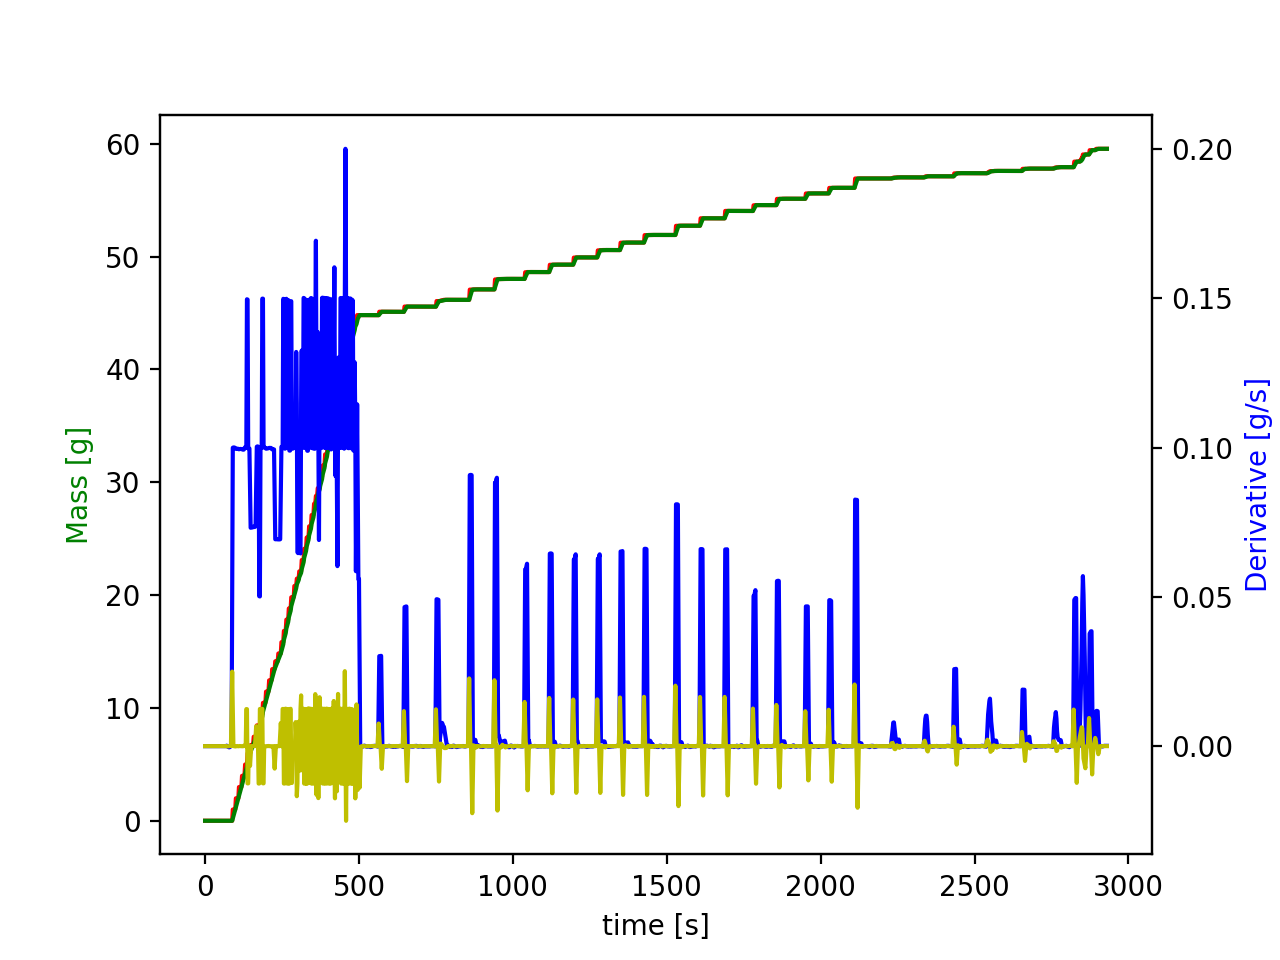

Addition of 0.301g Texapon SB 3 KC detected from 560s to 580s - expected volume = 0.57mL and actual volume = 0.272mL (resulting error is 52.324%)
Addition of 0.465g Texapon SB 3 KC detected from 642s to 662s - expected volume = 0.57mL and actual volume = 0.42mL (resulting error is 26.265%)
Addition of 0.605g Plantapon LC 7 detected from 746s to 790s - expected volume = 0.775mL and actual volume = 0.571mL (resulting error is 26.322%)
Addition of 0.931g Dehyton MC detected from 854s to 886s - expected volume = 0.911mL and actual volume = 0.858mL (resulting error is 5.875%)
Addition of 0.935g Dehyton MC detected from 936s to 982s - expected volume = 0.812mL and actual volume = 0.861mL (resulting error is 6.118%)
Addition of 0.611g Dehyton PK 45 detected from 1034s to 1060s - expected volume = 0.602mL and actual volume = 0.586mL (resulting error is 2.6%)
Addition of 0.659g Dehyton PK 45 detected from 1114s to 1142s - expected volume = 0.602mL and actual volume = 0.632mL (resulting error is

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


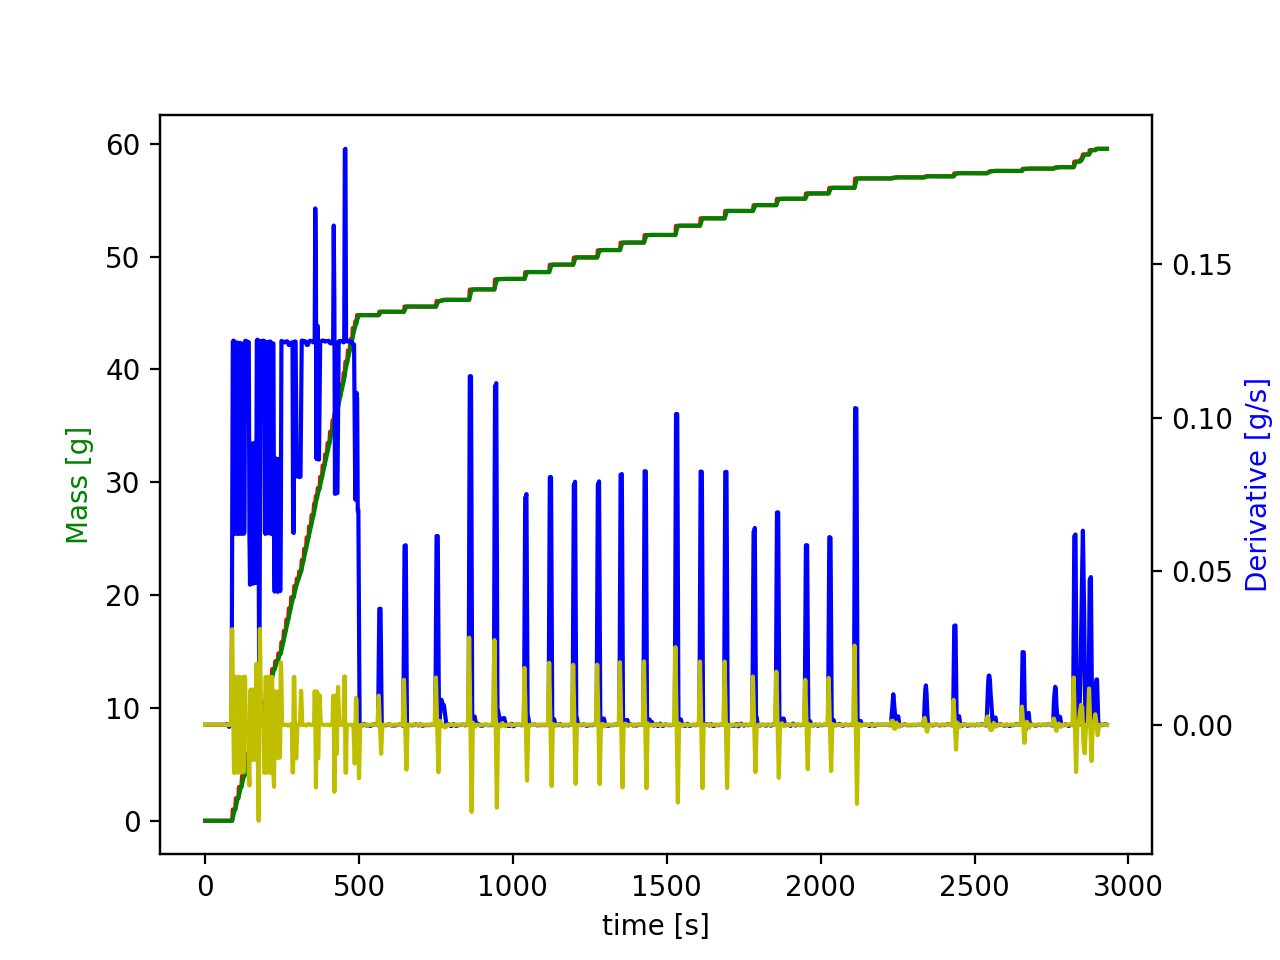

Addition of 0.099g Dehyquart CC7 Benz detected from 2226s to 2260s - expected volume = 0.11mL and actual volume = 0.096mL (resulting error is 12.611%)
Addition of 0.101g Dehyquart CC7 Benz detected from 2332s to 2354s - expected volume = 0.104mL and actual volume = 0.1mL (resulting error is 3.245%)
Addition of 0.278g Dehyquart CC7 Benz detected from 2428s to 2458s - expected volume = 0.272mL and actual volume = 0.272mL (resulting error is 0.224%)
Addition of 0.206g Dehyquart CC7 Benz detected from 2536s to 2576s - expected volume = 0.196mL and actual volume = 0.2mL (resulting error is 1.733%)
Addition of 0.211g Dehyquart CC7 Benz detected from 2650s to 2684s - expected volume = 0.206mL and actual volume = 0.208mL (resulting error is 0.897%)
Addition of 0.131g Dehyquart CC7 Benz detected from 2752s to 2786s - expected volume = 0.125mL and actual volume = 0.13mL (resulting error is 3.346%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2226,2280,2400,2500,2600,2700,2800])

## Analyse Thickeners

<IPython.core.display.Javascript object>


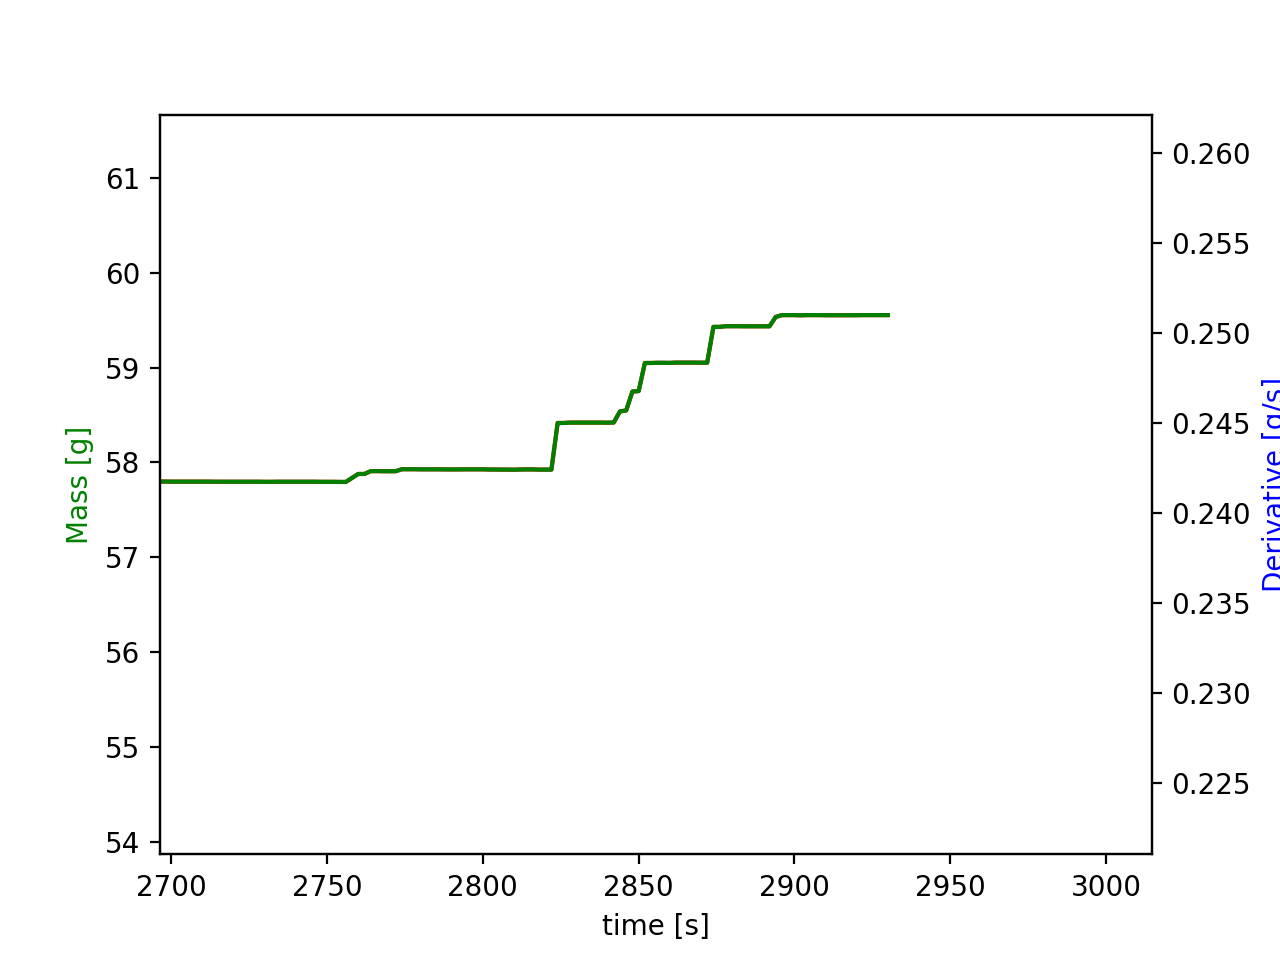

Addition of 0.496g Arlypon F detected from 2820s to 2836s - expected volume = 0.56mL and actual volume = 0.558mL (resulting error is 0.402%)
Addition of 0.128g Arlypon F detected from 2836s to 2846s - expected volume = 0.126mL and actual volume = 0.147mL (resulting error is 16.364%)
Addition of 0.204g Arlypon F detected from 2846s to 2850s - expected volume = 0.214mL and actual volume = 0.23mL (resulting error is 7.368%)
Addition of 0.301g Arlypon F detected from 2850s to 2864s - expected volume = 0.331mL and actual volume = 0.338mL (resulting error is 2.034%)
Addition of 0.383g Arlypon F detected from 2864s to 2884s - expected volume = 0.419mL and actual volume = 0.436mL (resulting error is 4.076%)
Addition of 0.118g Arlypon F detected from 2884s to 2908s - expected volume = 0.114mL and actual volume = 0.134mL (resulting error is 18.0%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
#t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2820,2836,2846,2850,2864,2884,2907])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_100523_S367-S372.csv', index=False)
actualMassFractions

,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
366,367.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.224776,0.0,10.910008,0.000000,0.0,0.0,0.987954,0.0,4.962278,0.0
367,368.0,7.88744,0.0,0.000000,0.0,0.0,0.000000,13.080478,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.036804,0.0,1.318867,0.0
368,369.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,12.917462,0.0,0.000000,0.0,0.000000,9.686608,0.0,0.0,2.763100,0.0,2.024867,0.0
369,370.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,13.131710,0.0,0.000000,8.307756,0.0,0.0,2.046074,0.0,2.996925,0.0
370,371.0,0.00000,0.0,0.000000,0.0,0.0,9.206728,13.304211,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.085582,0.0,3.787922,0.0
371,372.0,0.00000,0.0,6.061744,0.0,0.0,9.368696,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.315265,0.0,1.182486,0.0
